# Dynamics of a four-link bar - analytical solution
The idea of a solution we are going to implement is to calculate kinematics of a four-link bar knowing it's geometry and angular acceleration of the first joint. From kinematics we can find all positions, velocities and angular velocities, which will allow us to construct Lagrangian equation and get the desired torque function.

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Constants and equations

In [ ]:
m1 = 0.12182
I1 = 1.6519e-4
m2 = 0.18498
I2 = 2.8375e-4
m3 = 0.34023
I3 = 1.5509e-3
g = 9.18

O1A = 0.09
AB = 0.042426
BO2 = 0.077621
O2 = sp.Matrix([0.045, -0.05])
e = 0.2
q0 = -9*sp.pi/180

def A(q):
    return sp.Matrix(
        [O1A * sp.cos(q),
         O1A * sp.sin(q)]
    )

def B(q):
    Ac = A(q)
    R = sp.sqrt((O2[0] - Ac[0])**2 + (O2[1] - Ac[1])**2)
    return sp.Matrix(
        [0.5*(Ac[0]+O2[0])+(AB**2-BO2**2)*(O2[0]-Ac[0])/(2*R**2)-0.5*sp.sqrt(2*(AB**2+BO2**2)/R**2-(AB**2-BO2**2)**2/R**4-1)*(O2[1]-Ac[1]),
         0.5*(Ac[1]+O2[1])+(AB**2-BO2**2)*(O2[1]-Ac[1])/(2*R**2)+0.5*sp.sqrt(2*(AB**2+BO2**2)/R**2-(AB**2-BO2**2)**2/R**4-1)*(O2[0]-Ac[0])]
    )

def CM1(q):
    return 0.5 * A(q)

def CM2(q):
    Ac = A(q)
    Bc = B(q)
    return Bc + 0.01105 * (Bc - Ac) / AB

def CM3(q):
    Bc = B(q)
    q3 = sp.atan2(Bc[1]-O2[1], Bc[0]-O2[0])
    return sp.Matrix(
        [0.0144*sp.cos(q3+np.deg2rad(112.443))+O2[0],
         0.0144*sp.sin(q3+np.deg2rad(112.443))+O2[1]]
    )

### Angular velocities of COMs

In [ ]:
t = sp.Symbol('t', real=True)
q_sym = sp.Function('q')(t)
q_dot = q_sym.diff(t)
q_ex = q0 + 0.5 * e * t**2
v1 = CM1(q_sym).diff(t)
v2 = CM2(q_sym).diff(t)
v3 = CM3(q_sym).diff(t)
v1_abs = sp.sqrt(v1[0]**2 + v1[1]**2)
v2_abs = sp.sqrt(v2[0]**2 + v2[1]**2)
v3_abs = sp.sqrt(v3[0]**2 + v3[1]**2)
w1 = v1_abs / (O1A / 2)
w2 = v2_abs / (AB + 0.01105)
w3 = v3_abs / 0.0144

### Energy of the system

In [ ]:
T = 0.5 * (I1 * w1**2 + m1 * v1_abs**2) + \
    0.5 * (I2 * w2**2 + m2 * v2_abs**2) + \
    0.5 * (I3 * w3**2 + m3 * v3_abs**2)
P = m1 * g * CM1(q_sym)[1] + m2 * g * CM2(q_sym)[1] + m3 * g * CM3(q_sym)[1]
L = T - P
M = L.diff(q_sym.diff(t)).diff(t) - L.diff(q_sym)

### Simulation (takes up to 1-2 minutes)

In [ ]:
q_func = q0 + 0.5 * e * t**2
M_of_t = M.subs(q_sym, q_func)
Ms = []
ts = np.linspace(0, 3.15, 66)
for cur_t in ts:
  Ms.append(M_of_t.subs(t, cur_t).evalf().doit())

### Ansys results

In [ ]:
M_ansys = [
    0.1305,
    0.13052,
    0.1305,
    0.13058,
    0.13075,
    0.13099,
    0.13131,
    0.13171,
    0.13218,
    0.13272,
    0.13331,
    0.13396,
    0.13465,
    0.13538,
    0.13614,
    0.13691,
    0.1377,
    0.13849,
    0.13927,
    0.14003,
    0.14078,
    0.14149,
    0.14216,
    0.14278,
    0.14335,
    0.14385,
    0.14428,
    0.14464,
    0.14491,
    0.14509,
    0.14517,
    0.14514,
    0.14501,
    0.14476,
    0.14438,
    0.14388,
    0.14325,
    0.14247,
    0.14155,
    0.14048,
    0.13925,
    0.13785,
    0.13629,
    0.13455,
    0.13263,
    0.13052,
    0.12821,
    0.12569,
    0.12297,
    0.12002,
    0.11684,
    0.11342,
    0.10975,
    0.10582,
    0.10161,
    0.097101,
    0.092283,
    0.087134,
    0.081634,
    0.075766,
    0.069525,
    0.062952,
    0.056238,
    0.050121,
    0.047893,
    0.054844,
]

t_ansys = [
    0,  
    0.01,
    0.03,
    0.07,
    0.12,
    0.17,  
    0.22,  
    0.27,  
    0.32,  
    0.37, 
    0.42,  
    0.47,  
    0.52,  
    0.57,  
    0.62,  
    0.67,  
    0.72,  
    0.77,  
    0.82,  
    0.87,  
    0.92,  
    0.97,  
    1.02,  
    1.07,  
    1.12,  
    1.17,  
    1.22,  
    1.27,  
    1.32,  
    1.37,  
    1.42,  
    1.47,  
    1.52,  
    1.57,  
    1.62,  
    1.67,  
    1.72,  
    1.77, 
    1.82,  
    1.87,  
    1.92,  
    1.97,  
    2.02,  
    2.07,  
    2.12,  
    2.17,  
    2.22,  
    2.27,  
    2.32,  
    2.37,  
    2.42,  
    2.47,  
    2.52,  
    2.57,  
    2.62,  
    2.67,  
    2.72,  
    2.77,  
    2.82,  
    2.87,  
    2.92,  
    2.97,  
    3.02,  
    3.07,  
    3.12,  
    3.15,  
]

### Comparison

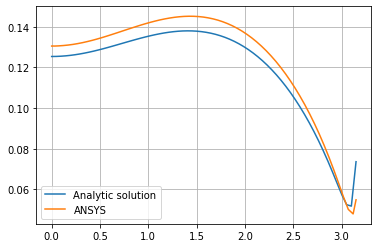

In [ ]:
plt.plot(ts, Ms, label='Analytic solution')
plt.plot(t_ansys, M_ansys, label='ANSYS')
plt.legend()
plt.grid()
plt.show()